In [70]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Rule Level Data

In [71]:
df = pd.read_csv("../output_data/seth/all_fields_data.csv")
df.sort_values(by=["communityID", "ruleID"], inplace=True)

In [72]:
df.head(5)

,name_change_type,description_change_type,violation_change_type,date_observed,timestamp_rule,communityID,ref,ruleID,rule_age_in_days
9252,unchanged,unchanged,never_present,2021-04-23 00:00:00,2021-04-01,0ne_0f_us,https://www.reddit.com/r/0ne_0f_us/,0ne_0f_us_0,22
11862,unchanged,unchanged,never_present,2021-04-23 00:00:00,2021-03-01,100waysto,https://www.reddit.com/r/100waysto/,100waysto_0,53
11863,unchanged,unchanged,never_present,2021-04-23 00:00:00,2021-03-01,100waysto,https://www.reddit.com/r/100waysto/,100waysto_1,53
11864,unchanged,unchanged,never_present,2021-04-23 00:00:00,2021-03-01,100waysto,https://www.reddit.com/r/100waysto/,100waysto_2,53
3221,unchanged,unchanged,never_present,2021-04-23 00:00:00,2021-04-01,100xcoin,https://www.reddit.com/r/100xcoin/,100xcoin_0,22


# Sub Level Data

In [73]:
agg_data = pd.DataFrame(df[['communityID', 'name_change_type']].groupby(['communityID', 'name_change_type']).agg(len)).reset_index()

In [74]:
sub_data = agg_data.pivot(index='communityID', columns='name_change_type', values=0).fillna(0).reset_index()

In [75]:
df = pd.read_csv("../output_data/seth/sub_metadata.csv")

In [76]:
sub_metadata = sub_data.set_index('communityID').join(df.set_index('communityID'), on=['communityID'])

In [77]:
sub_metadata['age_in_months'] = \
        (pd.to_datetime('2021-04-23') - pd.to_datetime(sub_metadata['founding_date'] * 10**9))/ np.timedelta64(1, 'M')
sub_metadata


,added,changed,deleted,unchanged,subscribers_1,subscribers_2,rules_1,rules_2,founding_date,age_in_months
communityID,,,,,,,,,,
0ne_0f_us,0.0,0.0,0.0,1.0,9,9,1,1,1.618169e+09,0.367704
100waysto,0.0,0.0,0.0,3.0,3,3,3,3,1.617180e+09,0.743731
100xcoin,0.0,0.0,0.0,7.0,12667,14013,7,7,1.617505e+09,0.620121
14x14,0.0,0.0,0.0,1.0,1,15,1,1,1.617822e+09,0.499537
180gameplaybannypro,0.0,0.0,0.0,1.0,6,6,1,1,1.617916e+09,0.463958
...,...,...,...,...,...,...,...,...,...,...
zone8gardening,0.0,0.0,0.0,4.0,20,53,4,4,1.617749e+09,0.527567
zoomiestoken,0.0,0.0,0.0,4.0,148,143,4,4,1.618574e+09,0.213581
zoosandaquariums,0.0,0.0,0.0,3.0,3,3,3,3,1.616605e+09,0.962436


## Punctuated Eq Scatterplot

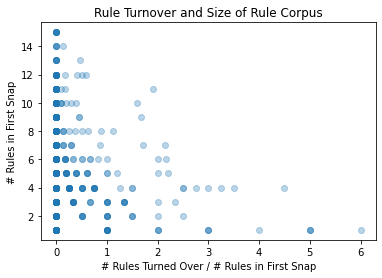

In [78]:
x = np.array((sub_metadata.added + sub_metadata.deleted + sub_metadata.changed)/sub_metadata.rules_1)
y = np.array(sub_metadata.rules_1)

# Plot the scatter plot with the calculated area
colors = np.random.rand(N)
plt.scatter(x, y, alpha=0.3)

plt.xlabel("# Rules Turned Over / # Rules in First Snap")
plt.ylabel("# Rules in First Snap")
plt.title("Rule Turnover and Size of Rule Corpus")

plt.show()

## H: The bigger the sub, the more likely that they will add >=1 rule

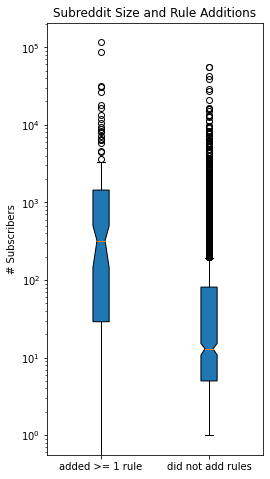

In [79]:
# Creating dataset
added = np.array(sub_metadata[sub_metadata.added > 0].subscribers_1)
not_added = np.array(sub_metadata[sub_metadata.added == 0].subscribers_1)
data = np.array([added, not_added], dtype=object)
 
fig = plt.figure(figsize =(3, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data,
                 notch=True,  # notch shape
                 vert=True,  # vertical box alignment
                 patch_artist=True,  # fill with color
                 labels=['added >= 1 rule', 'did not add rules'])  # will be used to label x-ticks
plt.yscale("log")

# ax.set_xticklabels(['added >= 1 rule', 'did not add rules'])
plt.ylabel("# Subscribers")
plt.title("Subreddit Size and Adding a Rule")

# show plot
plt.show()

## H: the bigger the sub, the more rules they add

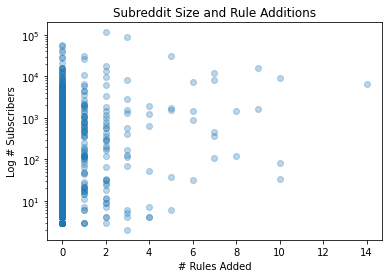

In [92]:
y = np.array(sub_metadata.subscribers_1 + 2)
x = np.array(sub_metadata.added)

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)
plt.yscale("log")

plt.ylabel("# Subscribers")
plt.xlabel("# Rules Added")
plt.title("Subreddit Size and Rule Additions")

plt.show()

## H: the bigger the sub, the more rules they add

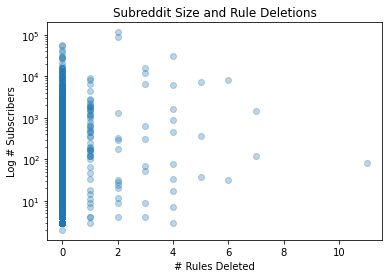

In [93]:
y = np.array(sub_metadata.subscribers_1 + 2)
x = np.array(sub_metadata.deleted)

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)
plt.yscale("log")

plt.ylabel("Log # Subscribers")
plt.xlabel("# Rules Deleted")
plt.title("Subreddit Size and Rule Deletions")

plt.show()

## H: The bigger the sub, the more likely they will delete >=1 rule

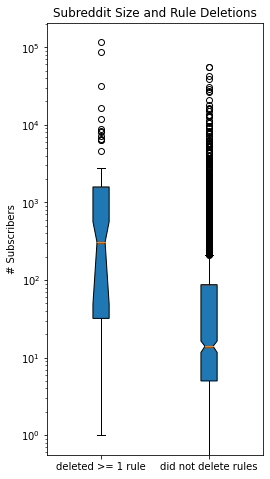

In [80]:
# Creating dataset
deleted = np.array(sub_metadata[sub_metadata.deleted > 0].subscribers_1)
not_deleted = np.array(sub_metadata[sub_metadata.deleted == 0].subscribers_1)
data = np.array([deleted, not_deleted], dtype=object)
 
fig = plt.figure(figsize =(3, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data,
                 notch=True,  # notch shape
                 vert=True,  # vertical box alignment
                 patch_artist=True,  # fill with color
                 labels=['deleted >= 1 rule', 'did not delete rules'])  # will be used to label x-ticks
plt.yscale("log")

# ax.set_xticklabels(['added >= 1 rule', 'did not add rules'])
plt.ylabel("# Subscribers")
plt.title("Subreddit Size and Deleting a Rule")

# show plot
plt.show()